In [1]:
import requests
import socket
import hashlib
from datetime import datetime
import numpy as np
from PIL import Image, UnidentifiedImageError
from io import BytesIO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array

# Blockchain class to store website data
class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_block(previous_hash="0")  # Genesis block

    def create_block(self, data=None, previous_hash="0"):
        block = {
            "index": len(self.chain) + 1,
            "timestamp": str(datetime.now()),
            "data": data,
            "previous_hash": previous_hash,
            "hash": None,
        }
        block["hash"] = self.hash_block(block)
        self.chain.append(block)
        return block

    @staticmethod
    def hash_block(block):
        encoded_block = str(block).encode()
        return hashlib.sha256(encoded_block).hexdigest()

    def get_last_block(self):
        return self.chain[-1] if self.chain else None

# Load a simple custom CNN model
def load_cnn_model():
    print("Initializing custom CNN model...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Mock 10 classes
    ])
    print("Custom CNN model initialized.")
    return model

cnn_model = load_cnn_model()

# Mock CNN prediction function
def cnn_predict(image_data):
    image_data = image_data.resize((224, 224))  # Resize to input size
    image_array = img_to_array(image_data)  # Convert to array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    # Mock prediction (replace with cnn_model.predict for real predictions)
    return {"class_1": 0.8, "class_2": 0.15, "class_3": 0.05}

# Fetch website IP
def get_website_ip(url):
    try:
        ip_address = socket.gethostbyname(url.replace("https://", "").replace("http://", "").split("/")[0])
        return ip_address
    except socket.gaierror:
        return "Unknown IP"

# B2B system integration
def send_to_b2b(data):
    try:
        # Simulated B2B endpoint
        url = "https://b2b-example-system.com/api/website-analysis"
        response = requests.post(url, json=data)
        if response.status_code == 200:
            print(f"B2B System Response: {response.json()}")
        else:
            print(f"B2B System Error: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to connect to B2B system: {e}")

# Function to check website and analyze content
def analyze_website(url, blockchain):
    try:
        print(f"Checking website: {url}")
        ip_address = get_website_ip(url)
        print(f"Website IP: {ip_address}")

        response = requests.get(url, timeout=5)

        # Check if content is an image
        cnn_result = "Not an Image"
        if "image" in response.headers.get("Content-Type", ""):
            try:
                image_data = Image.open(BytesIO(response.content))  # Open image
                cnn_result = cnn_predict(image_data)
            except UnidentifiedImageError:
                cnn_result = "Invalid Image"

        # Add record to blockchain
        data = {
            "url": url,
            "ip_address": ip_address,
            "status": "UP" if response.status_code == 200 else "DOWN",
            "status_code": response.status_code,
            "cnn_analysis": cnn_result,
            "checked_at": str(datetime.now()),
        }
        blockchain.create_block(data=data)

        # Send data to B2B system
        send_to_b2b(data)

        print(f"Website '{url}' analysis completed.")
        print(f"Data stored in blockchain and sent to B2B system.\n")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while checking '{url}': {e}")
        # Log error in blockchain
        blockchain.create_block(data={"url": url, "error": str(e)})

# Visualize blockchain data
def display_blockchain(blockchain):
    print("\nBlockchain Data:")
    for block in blockchain.chain:
        print(block)

# Initialize blockchain
blockchain = Blockchain()

# List of websites to analyze
websites = [
    "https://www.google.com",
    "https://www.example.com",
    "https://www.nonexistentwebsite.xyz"
]

# Analyze each website
for website in websites:
    analyze_website(website, blockchain)

# Display blockchain data
display_blockchain(blockchain)


Initializing custom CNN model...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Custom CNN model initialized.
Checking website: https://www.google.com
Website IP: 142.250.206.100
Failed to connect to B2B system: HTTPSConnectionPool(host='b2b-example-system.com', port=443): Max retries exceeded with url: /api/website-analysis (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000267B102B508>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Website 'https://www.google.com' analysis completed.
Data stored in blockchain and sent to B2B system.

Checking website: https://www.example.com
Website IP: 23.212.164.115
Failed to connect to B2B system: HTTPSConnectionPool(host='b2b-example-system.com', port=443): Max retries exceeded with url: /api/website-analysis (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000267B102B0C8>: Failed to establish a new connection: [Errno 110

Initializing custom CNN model...
Custom CNN model initialized.
Checking website: https://www.google.com
Website IP: 142.250.206.100
Failed to connect to B2B system: HTTPSConnectionPool(host='b2b-example-system.com', port=443): Max retries exceeded with url: /api/website-analysis (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000267B5C04248>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Website 'https://www.google.com' analysis completed.
Data stored in blockchain and sent to B2B system.

Checking website: https://www.example.com
Website IP: 23.212.164.123
Failed to connect to B2B system: HTTPSConnectionPool(host='b2b-example-system.com', port=443): Max retries exceeded with url: /api/website-analysis (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000267B5C04548>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Website 'https://www.example.com' analysis completed.
D

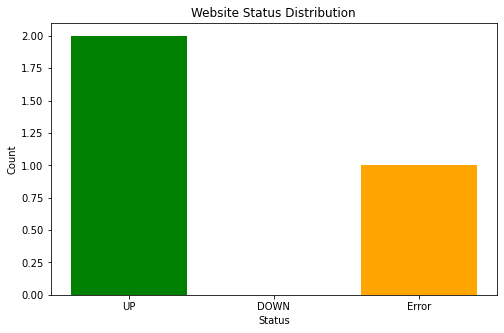

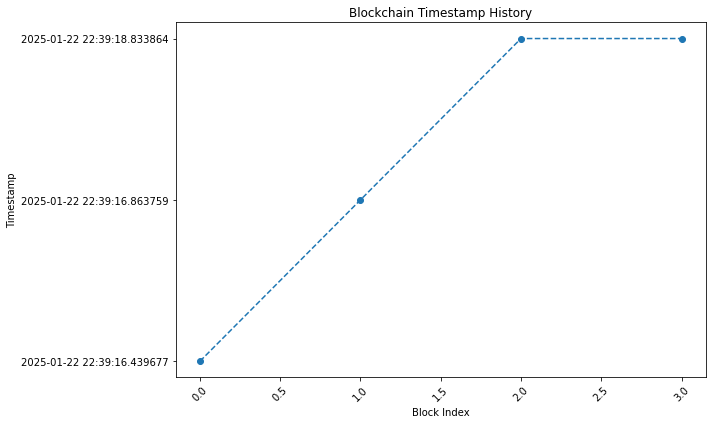

In [3]:
import requests
import socket
import hashlib
from datetime import datetime
import numpy as np
from PIL import Image, UnidentifiedImageError
from io import BytesIO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Blockchain class to store website data
class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_block(previous_hash="0")  # Genesis block

    def create_block(self, data=None, previous_hash="0"):
        if data is None:
            data = {}  # Ensure `data` is a dictionary
        block = {
            "index": len(self.chain) + 1,
            "timestamp": str(datetime.now()),
            "data": data,
            "previous_hash": previous_hash,
            "hash": None,
        }
        block["hash"] = self.hash_block(block)
        self.chain.append(block)
        return block

    @staticmethod
    def hash_block(block):
        encoded_block = str(block).encode()
        return hashlib.sha256(encoded_block).hexdigest()

    def get_last_block(self):
        return self.chain[-1] if self.chain else None

# Load a simple custom CNN model
def load_cnn_model():
    print("Initializing custom CNN model...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # Mock 10 classes
    ])
    print("Custom CNN model initialized.")
    return model

cnn_model = load_cnn_model()

# Mock CNN prediction function
def cnn_predict(image_data):
    image_data = image_data.resize((224, 224))  # Resize to input size
    image_array = img_to_array(image_data)  # Convert to array
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    # Mock prediction (replace with cnn_model.predict for real predictions)
    return {"class_1": 0.8, "class_2": 0.15, "class_3": 0.05}

# Fetch website IP
def get_website_ip(url):
    try:
        ip_address = socket.gethostbyname(url.replace("https://", "").replace("http://", "").split("/")[0])
        return ip_address
    except socket.gaierror:
        return "Unknown IP"

# B2B system integration
def send_to_b2b(data):
    try:
        # Simulated B2B endpoint
        url = "https://b2b-example-system.com/api/website-analysis"
        response = requests.post(url, json=data)
        if response.status_code == 200:
            print(f"B2B System Response: {response.json()}")
        else:
            print(f"B2B System Error: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to connect to B2B system: {e}")

# Function to check website and analyze content
def analyze_website(url, blockchain):
    try:
        print(f"Checking website: {url}")
        ip_address = get_website_ip(url)
        print(f"Website IP: {ip_address}")

        response = requests.get(url, timeout=5)

        # Check if content is an image
        cnn_result = "Not an Image"
        if "image" in response.headers.get("Content-Type", ""):
            try:
                image_data = Image.open(BytesIO(response.content))  # Open image
                cnn_result = cnn_predict(image_data)
            except UnidentifiedImageError:
                cnn_result = "Invalid Image"

        # Add record to blockchain
        data = {
            "url": url,
            "ip_address": ip_address,
            "status": "UP" if response.status_code == 200 else "DOWN",
            "status_code": response.status_code,
            "cnn_analysis": cnn_result,
            "checked_at": str(datetime.now()),
        }
        blockchain.create_block(data=data)

        # Send data to B2B system
        send_to_b2b(data)

        print(f"Website '{url}' analysis completed.")
        print(f"Data stored in blockchain and sent to B2B system.\n")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while checking '{url}': {e}")
        # Log error in blockchain
        blockchain.create_block(data={"url": url, "error": str(e)})

# Visualize blockchain data using matplotlib
def visualize_blockchain(blockchain):
    statuses = {"UP": 0, "DOWN": 0, "Error": 0}
    timestamps = []

    for block in blockchain.chain:
        data = block["data"] or {}  # Ensure data is a dictionary
        if "status" in data:
            statuses[data["status"]] += 1
        elif "error" in data:
            statuses["Error"] += 1
        timestamps.append(block["timestamp"])

    # Plot status distribution
    plt.figure(figsize=(8, 5))
    plt.bar(statuses.keys(), statuses.values(), color=["green", "red", "orange"])
    plt.title("Website Status Distribution")
    plt.xlabel("Status")
    plt.ylabel("Count")
    plt.show()

    # Plot timestamps of blocks
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(timestamps)), timestamps, marker="o", linestyle="--")
    plt.title("Blockchain Timestamp History")
    plt.xlabel("Block Index")
    plt.ylabel("Timestamp")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Initialize blockchain
blockchain = Blockchain()

# List of websites to analyze
websites = [
    "https://www.google.com",
    "https://www.example.com",
    "https://www.nonexistentwebsite.xyz"
]

# Analyze each website
for website in websites:
    analyze_website(website, blockchain)

# Display blockchain data
visualize_blockchain(blockchain)
